<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/STEP_7_Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Documentation

# Finish Preprocess and data sequencing

In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


This code loads in the raw stock data and splits to x/y train and test sets and makes scalers for the x and y variables. The input for this is a raw.csv file

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib

# Load data
df = pd.read_csv("raw.csv")  # Assumes raw.csv is uploaded in Colab's working directory

# Drop rows with missing target values (Close Price)
df = df.dropna(subset=['Close'])

# Fill missing sentiment values with the last available value (forward fill)
df[['sentiment_polarity', 'sentiment_subjectivity']] = df[['sentiment_polarity', 'sentiment_subjectivity']].ffill()

# Drop any remaining NaN values to handle edge cases
df = df.dropna()

# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Select relevant features (excluding Date)
features = ['Open', 'High', 'Low', 'Volume', 'ATR', 'BB_High', 'BB_low', 'DC_High', 'DC_low',
            'KC_High', 'KC_Low', 'Williams_%R', 'sentiment_polarity', 'sentiment_subjectivity']
target = ['Close']

# Scaling
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[target])

# Convert to sequences for LSTM/CNN
sequence_length = 30

X_seq, y_seq = [], []
for i in range(len(X_scaled) - sequence_length):
    X_seq.append(X_scaled[i:i+sequence_length])
    y_seq.append(y_scaled[i+sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# Save scalers (Colab sidebar)
joblib.dump(scaler_x, "scaler_x.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

# Save processed data to Colab sidebar
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

print("✅ Preprocessing complete. Files saved:")
print("- X_train.npy, X_test.npy, y_train.npy, y_test.npy")
print("- scaler_x.pkl, scaler_y.pkl")


✅ Preprocessing complete. Files saved:
- X_train.npy, X_test.npy, y_train.npy, y_test.npy
- scaler_x.pkl, scaler_y.pkl


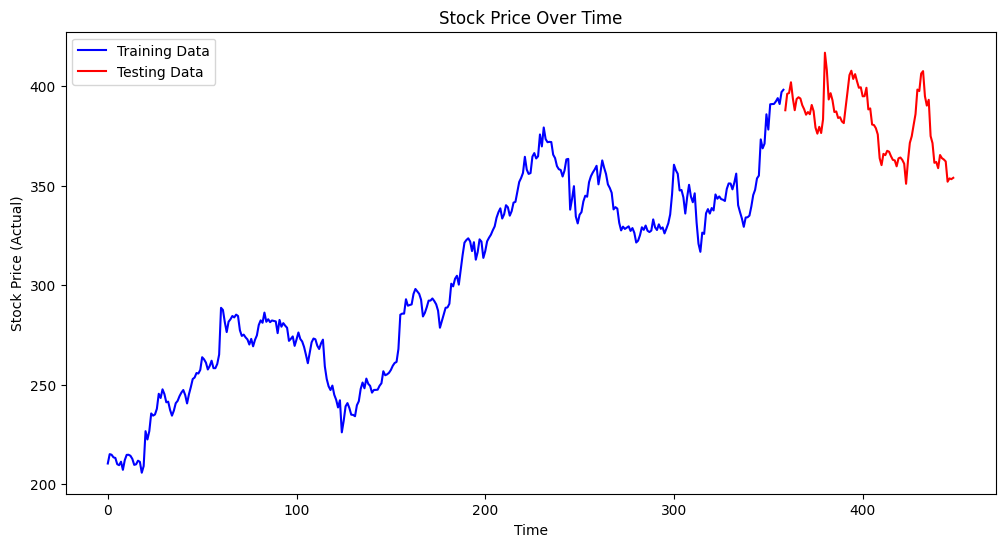

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Load preprocessed data from Colab sidebar
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

# Load scalers
scaler_y = joblib.load("scaler_y.pkl")

# Unscale target values (stock prices)
y_train_unscaled = scaler_y.inverse_transform(y_train)
y_test_unscaled = scaler_y.inverse_transform(y_test)

# Plot actual stock price vs time
plt.figure(figsize=(12,6))
plt.plot(y_train_unscaled, label="Training Data", color="blue")
plt.plot(range(len(y_train_unscaled), len(y_train_unscaled) + len(y_test_unscaled)), y_test_unscaled, label="Testing Data", color="red")
plt.xlabel("Time")
plt.ylabel("Stock Price (Actual)")
plt.title("Stock Price Over Time")
plt.legend()
plt.show()


# RNN

This RNN model is designed for multi-step stock price forecasting, predicting three future time steps using a deep architecture with three stacked SimpleRNN layers. It employs Bayesian hyperparameter tuning to optimize the number of RNN units, dropout rates, dense layer size, and learning rate, aiming to enhance prediction accuracy over multiple future days.

In [ ]:
#NEXT STEP IS TO FIX THE FILE ORGANIZATIONS OF THE SAVED MODELS AND HYPERPARAMS

Trial 20 Complete [00h 00m 23s]
val_loss: 0.00744347320869565

Best val_loss So Far: 0.004031213000416756
Total elapsed time: 00h 07m 39s
✅ Best hyperparameters saved in rnn1!
Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 0.5292 - mae: 0.5502 - val_loss: 0.4149 - val_mae: 0.5600
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1714 - mae: 0.3403 - val_loss: 0.1992 - val_mae: 0.3841
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1158 - mae: 0.2740 - val_loss: 0.0723 - val_mae: 0.2293
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0742 - mae: 0.2167 - val_loss: 0.0424 - val_mae: 0.1631
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0672 - mae: 0.2045 - val_loss: 0.0210 - val_mae: 0.1252
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0532 - mae: 0.1844 - val_loss: 0.0133 - val_mae: 0.0949
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0482 - mae: 0.1759 - val_loss: 0.0224 - val_mae: 0.1

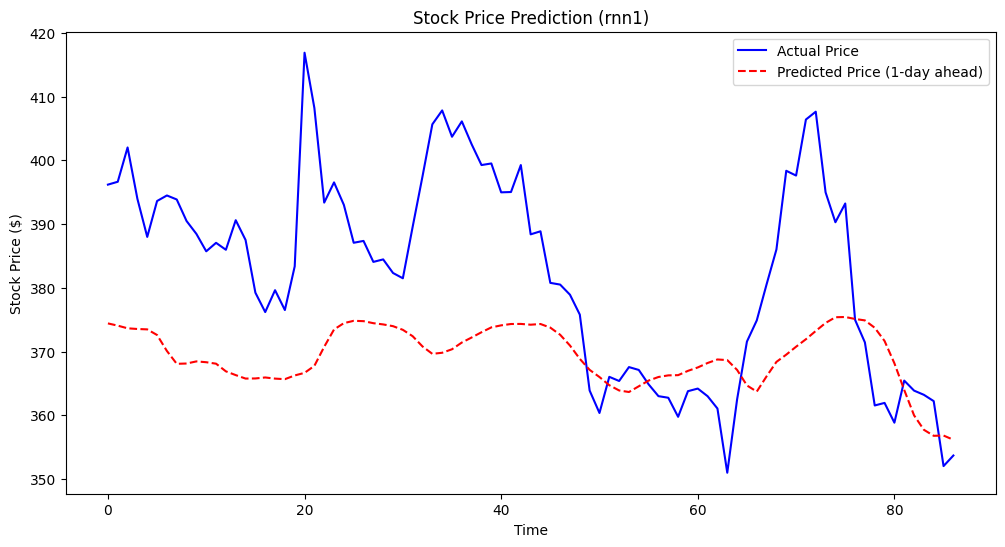


🎯 rnn1 Model Training & Prediction Complete! 🚀


In [7]:
#MultiStep RNN
import os
import numpy as np
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === Define Model Save Path ===
rnn_folder = "rnn1"  # Change to rnn2, rnn3, etc. for future models
os.makedirs(rnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Create Multi-Step Target ===
FUTURE_STEPS = 3  # Number of days ahead to predict

def create_future_labels(y, future_steps):
    y_future = np.zeros((y.shape[0] - future_steps, future_steps))
    for i in range(y_future.shape[0]):
        y_future[i] = y[i + 1: i + 1 + future_steps].flatten()
    return y_future

y_train_future = create_future_labels(y_train, FUTURE_STEPS)
y_test_future = create_future_labels(y_test, FUTURE_STEPS)
X_train = X_train[:y_train_future.shape[0]]
X_test = X_test[:y_test_future.shape[0]]

print(f"✅ New y_train shape: {y_train_future.shape}, y_test shape: {y_test_future.shape}")

# === Step 3: Define RNN Model for Hyperparameter Tuning ===
def build_rnn_model(hp):
    model = Sequential([
        SimpleRNN(
            units=hp.Int('rnn_units_1', min_value=50, max_value=150, step=25),
            return_sequences=True,
            input_shape=(X_train.shape[1], X_train.shape[2])
        ),
        Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.4, step=0.1)),

        SimpleRNN(
            units=hp.Int('rnn_units_2', min_value=50, max_value=150, step=25),
            return_sequences=True
        ),
        Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.4, step=0.1)),

        SimpleRNN(
            units=hp.Int('rnn_units_3', min_value=50, max_value=150, step=25)
        ),
        Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.4, step=0.1)),

        Dense(units=hp.Int('dense_units', min_value=10, max_value=50, step=10), activation="relu"),
        Dense(units=FUTURE_STEPS)
    ])

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# === Step 4: Initialize Bayesian Hyperparameter Tuner ===
tuner = kt.BayesianOptimization(
    build_rnn_model,
    objective="val_loss",
    max_trials=20,
    directory=os.path.join(rnn_folder, "tuning"),
    project_name="stock_forecasting"
)

# Perform Hyperparameter Search
tuner.search(X_train, y_train_future, epochs=50, validation_data=(X_test, y_test_future))

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# ✅ Save Best Hyperparameters in rnnX folder
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(rnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {rnn_folder}!")

# === Step 5: Train the Best Model ===
BATCH_SIZE = 16
history = best_model.fit(
    X_train, y_train_future,
    epochs=100,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test_future),
    verbose=1
)

# ✅ Save the Best Model in rnnX folder
best_model.save(os.path.join(rnn_folder, "best_rnn_model.keras"))
print(f"✅ Best RNN Model saved in {rnn_folder}!")

# === Step 6: Make Multi-Step Predictions ===
predictions = best_model.predict(X_test)

# === Step 7: Reverse Scale Predictions and Actual Values ===
def inverse_transform_multi_feature(scaler, data):
    """Properly inverse transform predictions to their actual stock price scale."""
    data = np.array(data).reshape(-1, 1)  # Reshape for transformation
    return scaler.inverse_transform(data)

# ✅ Unscale Predictions and Actual Prices
predictions_rescaled = inverse_transform_multi_feature(scaler_y, predictions[:, 0])
y_test_rescaled = inverse_transform_multi_feature(scaler_y, y_test_future[:, 0])

# === Step 8: Plot Multi-Step Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price (1-day ahead)", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({rnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

print(f"\n🎯 {rnn_folder} Model Training & Prediction Complete! 🚀")


This RNN model is optimized for single-step stock price prediction, using two SimpleRNN layers with tunable hyperparameters and a more extensive search space. It incorporates random search for hyperparameter tuning, early stopping for training efficiency, and saves the best model configuration for reproducibility.

Trial 10 Complete [00h 00m 32s]
val_loss: 0.0039296908071264625

Best val_loss So Far: 0.0020431560697034
Total elapsed time: 00h 05m 16s
✅ Best hyperparameters saved in rnn2!
Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 0.1649 - mae: 0.3162 - val_loss: 0.0115 - val_mae: 0.0904
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0454 - mae: 0.1718 - val_loss: 0.0205 - val_mae: 0.1218
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0336 - mae: 0.1435 - val_loss: 0.0130 - val_mae: 0.0956
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0248 - mae: 0.1250 - val_loss: 0.0148 - val_mae: 0.1082
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0219 - mae: 0.1159 - val_loss: 0.0080 - val_mae: 0.0744
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0191 - mae: 0.1134 - val_loss: 0.0079 - val_mae: 0.0775
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0182 - mae: 0.1056 - val_loss: 0.0085 - val_mae: 0.0792
Ep

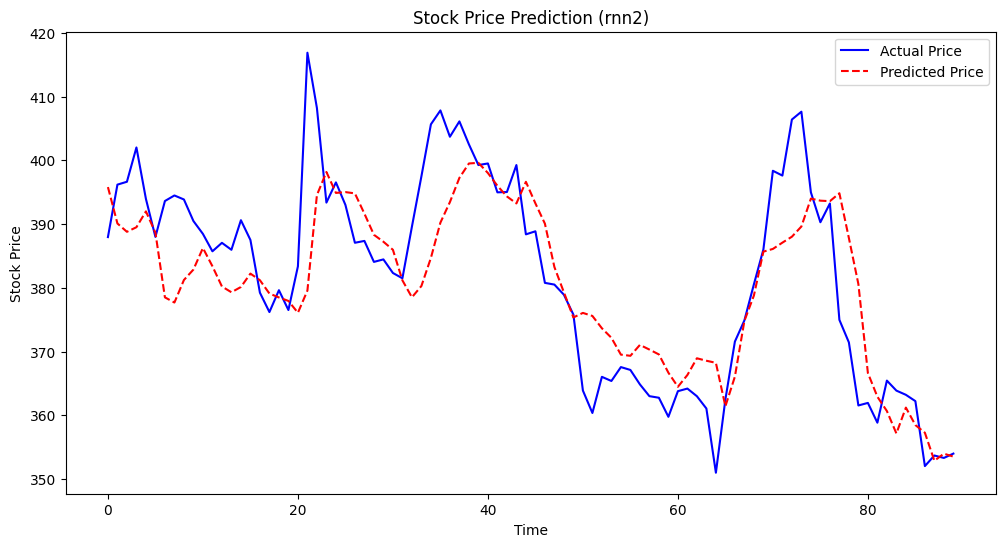


🎯 rnn2 Model Training & Prediction Complete! 🚀


In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
rnn_folder = "rnn2"  # Change to rnn3, rnn4, etc. for future models
os.makedirs(rnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_rnn_model(hp):
    """Builds an improved RNN model with tunable hyperparameters."""
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),  # ✅ Fixed Input Layer

        # First RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units', [75, 100, 125, 150]), return_sequences=True),
        Dropout(hp.Choice('dropout_rate', [0.05, 0.1, 0.2])),

        # Second RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units_2', [75, 100, 125, 150])),
        Dropout(hp.Choice('dropout_rate_2', [0.05, 0.1, 0.2])),

        # Fully Connected Layers
        Dense(units=50, activation="relu"),
        Dense(units=1)
    ])

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# ✅ Run More Trials
tuner = kt.RandomSearch(
    build_rnn_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    directory=os.path.join(rnn_folder, "tuning"),
    project_name="stock_prediction_tuned"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters in `rnn2/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(rnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {rnn_folder}!")

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `rnn2/`
best_model.save(os.path.join(rnn_folder, "best_rnn_model.keras"))
print(f"✅ Best RNN Model saved in {rnn_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the Close Price is inverse transformed.
    """
    data = np.array(data).reshape(-1, 1)  # Reshape for transformation
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({rnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {rnn_folder} Model Training & Prediction Complete! 🚀")


This RNN model employs three stacked SimpleRNN layers with Bayesian optimization to fine-tune hyperparameters, focusing on single-step stock price prediction. It improves hyperparameter saving, ensures correct batch size usage, and correctly rescales predictions using a modified inverse transformation method for accurate stock price reconstruction.

Trial 10 Complete [00h 00m 20s]
val_loss: 0.002907202346250415

Best val_loss So Far: 0.0027341353707015514
Total elapsed time: 00h 03m 18s
✅ Best hyperparameters saved in rnn3!
Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.1671 - mae: 0.3162 - val_loss: 0.0188 - val_mae: 0.1028
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0605 - mae: 0.1946 - val_loss: 0.0052 - val_mae: 0.0591
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0491 - mae: 0.1816 - val_loss: 0.0044 - val_mae: 0.0556
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0394 - mae: 0.1617 - val_loss: 0.0090 - val_mae: 0.0801
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0399 - mae: 0.1578 - val_loss: 0.0072 - val_mae: 0.0668
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0385 - mae: 0.1586 - val_loss: 0.0268 - val_mae: 0.1499
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0350 - mae: 0.1455 - val_loss: 0.0055 - val_mae: 0

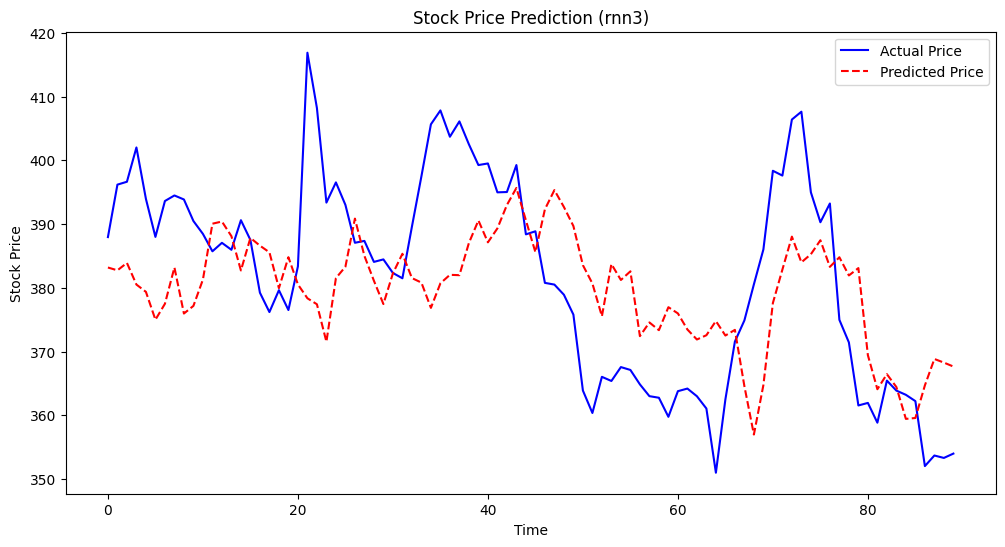


🎯 rnn3 Model Training & Prediction Complete! 🚀


In [9]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
rnn_folder = "rnn3"  # Change to rnn4, rnn5, etc. for future models
os.makedirs(rnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_rnn_model(hp):
    """Builds an RNN model with tunable hyperparameters."""
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),  # ✅ Fixed Input Layer

        # First RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units_1', [50, 75, 100]), return_sequences=True),
        Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2, 0.3])),

        # Second RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units_2', [50, 75, 100]), return_sequences=True),
        Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2, 0.3])),

        # Third RNN Layer
        SimpleRNN(units=hp.Choice('rnn_units_3', [50, 75, 100])),
        Dropout(hp.Choice('dropout_rate_3', [0.1, 0.2, 0.3])),

        # Fully Connected Layers
        Dense(units=25, activation="relu"),
        Dense(units=1)
    ])

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# Initialize Hyperparameter Tuner
tuner = kt.BayesianOptimization(
    build_rnn_model,
    objective="val_loss",
    max_trials=10,
    directory=os.path.join(rnn_folder, "tuning"),
    project_name="stock_prediction"
)

# Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Get Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# ✅ Save Best Hyperparameters in `rnn3/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(rnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {rnn_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 16

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `rnn3/`
best_model.save(os.path.join(rnn_folder, "best_rnn_model.keras"))
print(f"✅ Best RNN Model saved in {rnn_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the Close Price is inverse transformed.
    """
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({rnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {rnn_folder} Model Training & Prediction Complete! 🚀")


# CNN

This CNN model consists of three Conv1D layers with tunable filter sizes, kernel sizes, and dropout rates, followed by MaxPooling1D for downsampling. It uses a single fully connected Dense layer before the output layer, optimizing hyperparameters via RandomSearch. The model focuses on efficient feature extraction but lacks batch normalization, which could impact stability and training efficiency.



In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
cnn_folder = "cnn1"  # Change to cnn2, cnn3, etc. for future models
os.makedirs(cnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_cnn_model(hp):
    """Builds an improved CNN model with tunable hyperparameters."""
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),

        # First Convolutional Layer
        Conv1D(filters=hp.Choice('filters_1', [32, 64, 128]),
               kernel_size=hp.Choice('kernel_size_1', [3, 5, 7]),
               activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2])),

        # Second Convolutional Layer
        Conv1D(filters=hp.Choice('filters_2', [32, 64, 128]),
               kernel_size=hp.Choice('kernel_size_2', [3, 5, 7]),
               activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2])),

        # Third Convolutional Layer
        Conv1D(filters=hp.Choice('filters_3', [32, 64, 128]),
               kernel_size=hp.Choice('kernel_size_3', [3, 5]),
               activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(hp.Choice('dropout_rate_3', [0.1, 0.2])),

        # Flatten for Dense Layers
        Flatten(),

        # Dense Layers
        Dense(units=hp.Choice('dense_units_1', [64, 128, 256]), activation="relu"),
        Dropout(hp.Choice('dropout_rate_dense', [0.1, 0.2])),

        # Output Layer
        Dense(units=1)
    ])

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# ✅ Run More Trials
tuner = kt.RandomSearch(
    build_cnn_model,
    objective="val_loss",
    max_trials=15,
    executions_per_trial=2,
    directory=os.path.join(cnn_folder, "tuning"),
    project_name="stock_prediction_tuned"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=40, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters in `cnn1/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(cnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {cnn_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 16

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = best_model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `cnn1/`
best_model.save(os.path.join(cnn_folder, "best_cnn_model.keras"))
print(f"✅ Best CNN Model saved in {cnn_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the Close Price is inverse transformed.
    """
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({cnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {cnn_folder} Model Training & Prediction Complete! 🚀")


This enhanced CNN model builds on cnn1 by adding BatchNormalization after each convolutional layer, helping to stabilize training and improve generalization. It also includes an extra dense layer for deeper feature extraction and increases both the batch size and hyperparameter tuning trials for better performance. The longer training time and additional layers make it more robust for capturing complex stock price patterns compared to cnn1.

In [ ]:
#Improved CNN Model
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
cnn_folder = "cnn2"  # Change to cnn3, cnn4, etc. for future models
os.makedirs(cnn_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_cnn_model(hp):
    """Builds an upgraded CNN model with tunable hyperparameters."""
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),

        # First Convolutional Layer
        Conv1D(filters=hp.Choice('filters_1', [64, 128, 256]),
               kernel_size=hp.Choice('kernel_size_1', [3, 5, 7]),
               activation='relu'),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2, 0.3])),

        # Second Convolutional Layer
        Conv1D(filters=hp.Choice('filters_2', [64, 128, 256]),
               kernel_size=hp.Choice('kernel_size_2', [3, 5, 7]),
               activation='relu'),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2, 0.3])),

        # Third Convolutional Layer
        Conv1D(filters=hp.Choice('filters_3', [64, 128, 256]),
               kernel_size=hp.Choice('kernel_size_3', [3, 5]),
               activation='relu'),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Dropout(hp.Choice('dropout_rate_3', [0.1, 0.2, 0.3])),

        # Flatten for Dense Layers
        Flatten(),

        # Dense Layers (Extra Layer for More Depth)
        Dense(units=hp.Choice('dense_units_1', [128, 256, 512]), activation="relu"),
        Dropout(hp.Choice('dropout_rate_dense_1', [0.1, 0.2])),
        Dense(units=hp.Choice('dense_units_2', [64, 128, 256]), activation="relu"),  # Added extra dense layer
        Dropout(hp.Choice('dropout_rate_dense_2', [0.1, 0.2])),

        # Output Layer
        Dense(units=1)
    ])

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )

    return model

# ✅ Run More Trials for Better Tuning
tuner = kt.RandomSearch(
    build_cnn_model,
    objective="val_loss",
    max_trials=20,  # Increased number of trials for better tuning
    executions_per_trial=3,  # Run each config three times for better stability
    directory=os.path.join(cnn_folder, "tuning"),
    project_name="stock_prediction_tuned"
)

# ✅ Perform Hyperparameter Search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters in `cnn2/`
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(cnn_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {cnn_folder}!")

# ✅ Set Batch Size
BATCH_SIZE = 32  # Increased batch size for performance improvement

# === Step 3: Train the Best Model with Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=300,  # Train longer for better learning
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `cnn2/`
best_model.save(os.path.join(cnn_folder, "best_cnn_model.keras"))
print(f"✅ Best CNN Model saved in {cnn_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    """
    Properly inverse transforms a single feature using the original scaler.
    Ensures that only the Close Price is inverse transformed.
    """
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

# ✅ Rescale Predictions and Actual Prices
predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({cnn_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {cnn_folder} Model Training & Prediction Complete! 🚀")


In [ ]:
#Arima model test

#LSTM

LSTM1 is a standard two-layer LSTM model designed to capture sequential stock price patterns. It includes a single dense layer for feature extraction and dropout for regularization. This model serves as the baseline for performance comparisons with more advanced architectures.

Trial 10 Complete [00h 00m 21s]
val_loss: 0.012699069455265999

Best val_loss So Far: 0.009102684445679188
Total elapsed time: 00h 03m 32s
Results summary
Results in tuning/stock_prediction
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 08 summary
Hyperparameters:
lstm_units: 100
lstm_units_2: 75
dropout_rate: 0.3
learning_rate: 0.001
Score: 0.009102684445679188

Trial 05 summary
Hyperparameters:
lstm_units: 75
lstm_units_2: 50
dropout_rate: 0.1
learning_rate: 0.001
Score: 0.009858810342848301

Trial 07 summary
Hyperparameters:
lstm_units: 75
lstm_units_2: 75
dropout_rate: 0.2
learning_rate: 0.001
Score: 0.009871456306427717

Trial 04 summary
Hyperparameters:
lstm_units: 50
lstm_units_2: 75
dropout_rate: 0.2
learning_rate: 0.0005
Score: 0.010169227607548237

Trial 03 summary
Hyperparameters:
lstm_units: 100
lstm_units_2: 100
dropout_rate: 0.1
learning_rate: 0.0005
Score: 0.010249670129269361

Trial 00 summary
Hyperparameters:
lstm_units: 50
lstm_units_2: 100


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


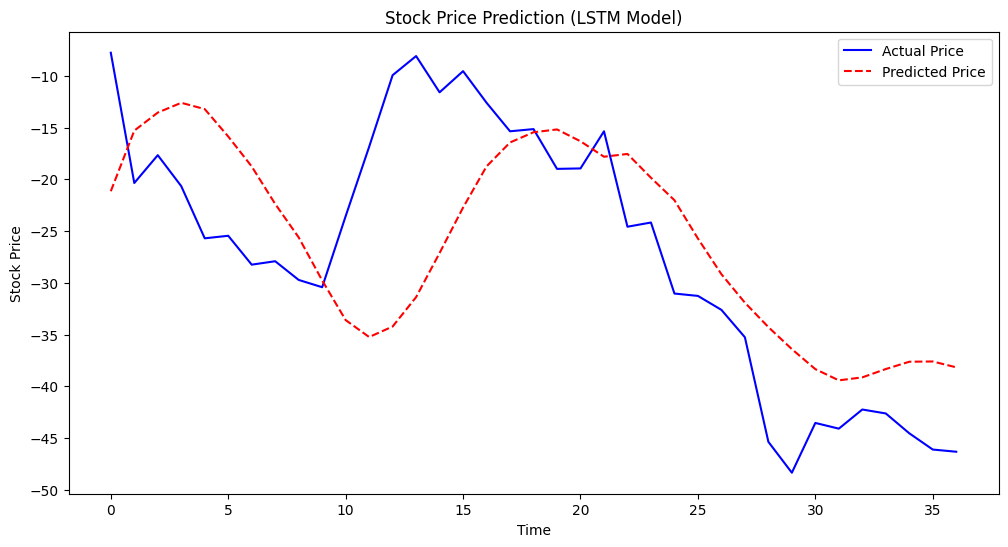


🎯 LSTM Model Training & Prediction Complete! 🚀


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Define Model Save Path ===
lstm_folder = "lstm1"
os.makedirs(lstm_folder, exist_ok=True)

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load the correct scaler for stock prices
scaler_y = joblib.load("scaler_y.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Hyperparameter Tuning ===
def build_lstm_model(hp):
    """Builds an LSTM model."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # LSTM Layers
    lstm = LSTM(units=hp.Choice('lstm_units', [50, 75, 100]), return_sequences=True)(inputs)
    lstm = LSTM(units=hp.Choice('lstm_units_2', [50, 75, 100]))(lstm)

    # Fully Connected Layers
    dense = Dense(50, activation="relu")(lstm)
    dense = Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3]))(dense)

    # Output Layer
    output = Dense(1)(dense)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_lstm_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    directory=os.path.join(lstm_folder, "tuning"),
    project_name="stock_prediction"
)

tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

# ✅ Save Best Hyperparameters in `lstm1/`
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open(os.path.join(lstm_folder, "best_hyperparameters.json"), "w") as f:
    json.dump(best_hps_dict, f)
print(f"✅ Best hyperparameters saved in {lstm_folder}!")

# === Step 3: Train the Best Model ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model in `lstm1/`
best_model.save(os.path.join(lstm_folder, "best_lstm_model.keras"))
print(f"✅ Best LSTM Model saved in {lstm_folder}!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data):
    data = np.array(data).reshape(-1, 1)
    return scaler.inverse_transform(data)

predictions_rescaled = inverse_transform_single_feature(scaler_y, predictions)
y_test_rescaled = inverse_transform_single_feature(scaler_y, y_test)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title(f"Stock Price Prediction ({lstm_folder})")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print(f"\n🎯 {lstm_folder} Model Training & Prediction Complete! 🚀")


LSTM2 enhances the baseline by using Bidirectional LSTMs, allowing it to learn patterns in both forward and backward directions. It also introduces batch normalization for stabilized training and an additional dense layer for better feature extraction. This model aims to reduce error and improve predictive accuracy over LSTM1.

In [ ]:
lstm_folder = "lstm2"
os.makedirs(lstm_folder, exist_ok=True)

def build_lstm_model(hp):
    """Builds an improved LSTM model with Bidirectional LSTMs and Batch Normalization."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # Bidirectional LSTM Layers
    lstm = tf.keras.layers.Bidirectional(LSTM(units=hp.Choice('lstm_units', [75, 100, 125]), return_sequences=True))(inputs)
    lstm = tf.keras.layers.Bidirectional(LSTM(units=hp.Choice('lstm_units_2', [75, 100, 125])))(lstm)

    # Fully Connected Layers
    dense = Dense(units=hp.Choice('dense_units_1', [64, 128]), activation="relu")(lstm)
    dense = Dropout(hp.Choice('dropout_rate_1', [0.1, 0.2]))(dense)
    dense = Dense(units=hp.Choice('dense_units_2', [32, 64]), activation="relu")(dense)
    dense = Dropout(hp.Choice('dropout_rate_2', [0.1, 0.2]))(dense)

    # Output Layer
    output = Dense(1)(dense)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

tuner = kt.RandomSearch(
    build_lstm_model,
    objective="val_loss",
    max_trials=15,
    executions_per_trial=3,
    directory=os.path.join(lstm_folder, "tuning"),
    project_name="stock_prediction"
)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# ✅ Increased batch size for improved learning
BATCH_SIZE = 32

# ✅ Train & Save `lstm2`
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=300, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)
best_model.save(os.path.join(lstm_folder, "best_lstm_model.keras"))

print(f"✅ Best LSTM Model saved in {lstm_folder}!")


# Ensemble Models

Trial 10 Complete [00h 00m 23s]
val_loss: 0.011019574478268623

Best val_loss So Far: 0.006544358562678099
Total elapsed time: 00h 03m 51s
Results summary
Results in lstm_cnn_tuning/stock_prediction_lstm_cnn
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 08 summary
Hyperparameters:
cnn_filters: 128
lstm_units: 75
lstm_units_2: 100
dropout_rate: 0.1
learning_rate: 0.0001
Score: 0.006544358562678099

Trial 00 summary
Hyperparameters:
cnn_filters: 128
lstm_units: 75
lstm_units_2: 50
dropout_rate: 0.2
learning_rate: 0.001
Score: 0.006904075853526592

Trial 05 summary
Hyperparameters:
cnn_filters: 128
lstm_units: 100
lstm_units_2: 50
dropout_rate: 0.3
learning_rate: 0.0001
Score: 0.007290423847734928

Trial 02 summary
Hyperparameters:
cnn_filters: 64
lstm_units: 50
lstm_units_2: 50
dropout_rate: 0.2
learning_rate: 0.0001
Score: 0.007927403086796403

Trial 01 summary
Hyperparameters:
cnn_filters: 128
lstm_units: 100
lstm_units_2: 100
dropout_rate: 0.2
learning_rate

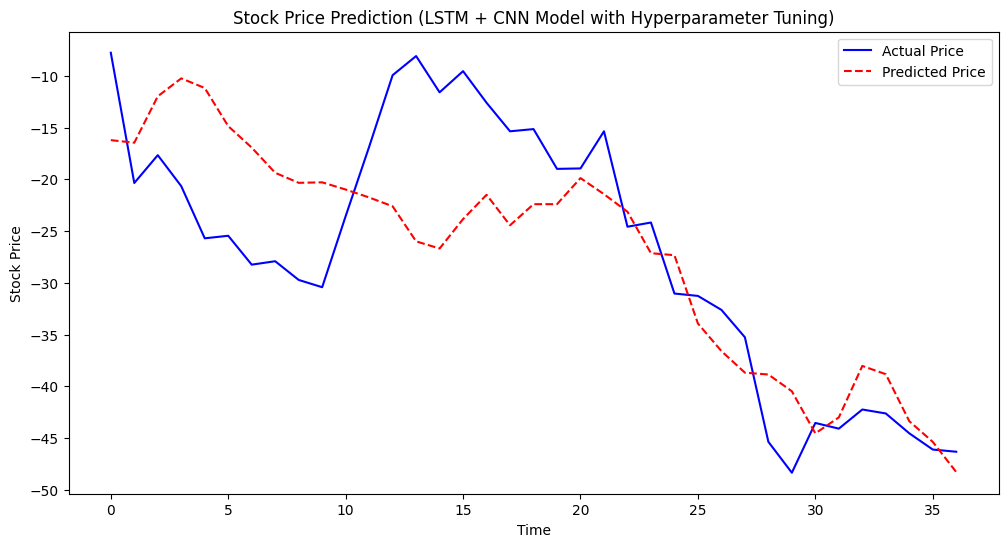


🎯 LSTM + CNN Model Training & Prediction Complete! 🚀


In [ ]:
#LSTM + CNN
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import os
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# ✅ Remove previous tuning directory if needed
if os.path.exists("lstm_cnn_tuning/stock_prediction"):
    print("🔄 Removing previous tuner files...")
    os.system("rm -rf lstm_cnn_tuning/stock_prediction")

# === Step 2: Hyperparameter Tuning ===
def build_model(hp):
    """Builds an LSTM + CNN model with hyperparameter tuning."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # CNN Branch
    cnn = Conv1D(filters=hp.Choice('cnn_filters', [32, 64, 128]), kernel_size=3, activation='relu')(inputs)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Flatten()(cnn)

    # LSTM Branch
    lstm = LSTM(units=hp.Choice('lstm_units', [50, 75, 100]), return_sequences=True)(inputs)
    lstm = LSTM(units=hp.Choice('lstm_units_2', [50, 75, 100]))(lstm)

    # Merge CNN and LSTM branches
    merged = Concatenate()([cnn, lstm])
    merged = Dense(50, activation="relu")(merged)
    merged = Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3]))(merged)

    # Output Layer
    output = Dense(1)(merged)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    directory="lstm_cnn_tuning",
    project_name="stock_prediction_lstm_cnn"
)

tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

tuner.results_summary()

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Train Best Model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model
best_model.save("best_lstm_cnn_model.keras")
print("✅ Best LSTM + CNN Model saved!")

# === Step 3: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 4: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 5: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data, feature_index=-1):
    expected_features = scaler.min_.shape[0]
    dummy = np.zeros((data.shape[0], expected_features))
    dummy[:, feature_index] = data.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

feature_index = -1
predictions_rescaled = inverse_transform_single_feature(scaler, predictions, feature_index)
y_test_rescaled = inverse_transform_single_feature(scaler, y_test.reshape(-1, 1), feature_index)

# === Step 6: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (LSTM + CNN Model with Hyperparameter Tuning)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 LSTM + CNN Model Training & Prediction Complete! 🚀")


✅ Data Loaded: X_train shape: (146, 50, 15), y_train shape: (146,)
✅ X_test shape: (37, 50, 15), y_test shape: (37,)
Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - loss: 0.2147 - mae: 0.3576 - val_loss: 0.0190 - val_mae: 0.1124
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0509 - mae: 0.1841 - val_loss: 0.0644 - val_mae: 0.2404
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0375 - mae: 0.1469 - val_loss: 0.0287 - val_mae: 0.1465
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 0.0273 - mae: 0.1283 - val_loss: 0.0099 - val_mae: 0.0814
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0249 - mae: 0.1255 - val_loss: 0.0267 - val_mae: 0.1455
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0199 - mae: 0.1095 - val_loss: 0.0085 - val_mae: 0.0796
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0183 - mae: 0.1036 - val_loss: 0.0192 - val_mae: 0.1250
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step -

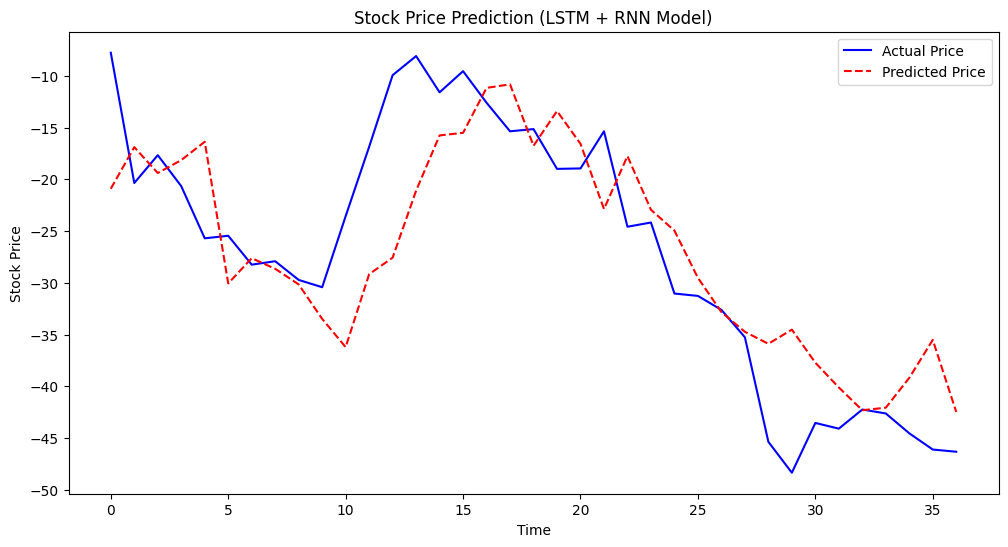


🎯 LSTM + RNN Model Training & Prediction Complete! 🚀


In [ ]:
#LSTM + RNN
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import os
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# === Step 2: Build and Train Model ===
def build_model():
    """Builds an LSTM + RNN model."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # RNN Branch
    rnn = SimpleRNN(units=75, return_sequences=True)(inputs)
    rnn = SimpleRNN(units=75)(rnn)

    # LSTM Branch
    lstm = LSTM(units=75, return_sequences=True)(inputs)
    lstm = LSTM(units=75)(lstm)

    # Merge RNN and LSTM branches
    merged = Concatenate()([rnn, lstm])
    merged = Dense(50, activation="relu")(merged)
    merged = Dropout(0.2)(merged)

    # Output Layer
    output = Dense(1)(merged)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Train Model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = build_model()
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model
model.save("best_lstm_rnn_model.keras")
print("✅ Best LSTM + RNN Model saved!")

# === Step 3: Evaluate the Model ===
loss, mae = model.evaluate(X_test, y_test)
print(f"✅ Model Test Loss: {loss}")
print(f"✅ Model Test MAE: {mae}")

# === Step 4: Make Predictions ===
predictions = model.predict(X_test)

# === Step 5: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data, feature_index=-1):
    expected_features = scaler.min_.shape[0]
    dummy = np.zeros((data.shape[0], expected_features))
    dummy[:, feature_index] = data.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

feature_index = -1
predictions_rescaled = inverse_transform_single_feature(scaler, predictions, feature_index)
y_test_rescaled = inverse_transform_single_feature(scaler, y_test.reshape(-1, 1), feature_index)

# === Step 6: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (LSTM + RNN Model)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 LSTM + RNN Model Training & Prediction Complete! 🚀")


Trial 10 Complete [00h 01m 03s]
val_loss: 0.00792448758147657

Best val_loss So Far: 0.004126881714910269
Total elapsed time: 00h 10m 46s
Results summary
Results in ensemble_tuning/stock_prediction_ensemble
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 04 summary
Hyperparameters:
cnn_filters: 64
rnn_units: 100
rnn_units_2: 100
lstm_units: 50
lstm_units_2: 100
dropout_rate: 0.2
learning_rate: 0.0005
Score: 0.004126881714910269

Trial 03 summary
Hyperparameters:
cnn_filters: 64
rnn_units: 75
rnn_units_2: 50
lstm_units: 75
lstm_units_2: 75
dropout_rate: 0.1
learning_rate: 0.001
Score: 0.005385397467762232

Trial 07 summary
Hyperparameters:
cnn_filters: 128
rnn_units: 75
rnn_units_2: 100
lstm_units: 50
lstm_units_2: 50
dropout_rate: 0.1
learning_rate: 0.0005
Score: 0.005943761207163334

Trial 08 summary
Hyperparameters:
cnn_filters: 64
rnn_units: 75
rnn_units_2: 75
lstm_units: 100
lstm_units_2: 75
dropout_rate: 0.1
learning_rate: 0.0005
Score: 0.0075133712962269

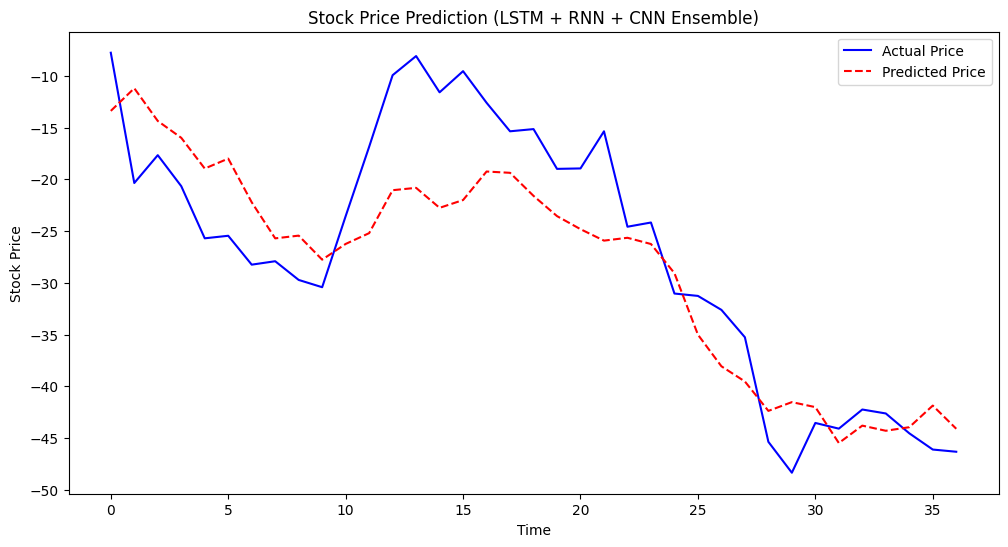


🎯 Ensemble Model Training & Prediction Complete! 🚀


In [ ]:
#Ensemble model test with LSTM RNN and CNN
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib
import json
import os
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Conv1D, Dense, Dropout, Flatten, Concatenate, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Load Preprocessed Data ===
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Load Scaler
scaler = joblib.load("scaler.pkl")

print(f"✅ Data Loaded: X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"✅ X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# ✅ Remove previous tuning directory if needed
if os.path.exists("ensemble_tuning/stock_prediction"):
    print("🔄 Removing previous tuner files...")
    os.system("rm -rf ensemble_tuning/stock_prediction")

# === Step 2: Hyperparameter Tuning ===
def build_ensemble_model(hp):
    """Builds an ensemble model with CNN, RNN, and LSTM."""
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # CNN Branch
    cnn = Conv1D(filters=hp.Choice('cnn_filters', [32, 64, 128]), kernel_size=3, activation='relu')(inputs)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Flatten()(cnn)

    # RNN Branch
    rnn = SimpleRNN(units=hp.Choice('rnn_units', [50, 75, 100]), return_sequences=True)(inputs)
    rnn = SimpleRNN(units=hp.Choice('rnn_units_2', [50, 75, 100]))(rnn)

    # LSTM Branch
    lstm = LSTM(units=hp.Choice('lstm_units', [50, 75, 100]), return_sequences=True)(inputs)
    lstm = LSTM(units=hp.Choice('lstm_units_2', [50, 75, 100]))(lstm)

    # Merge all branches
    merged = Concatenate()([cnn, rnn, lstm])
    merged = Dense(50, activation="relu")(merged)
    merged = Dropout(hp.Choice('dropout_rate', [0.1, 0.2, 0.3]))(merged)

    # Output Layer
    output = Dense(1)(merged)

    # Compile Model
    model = Model(inputs, output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ✅ Run Hyperparameter Tuning
tuner = kt.RandomSearch(
    build_ensemble_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=2,
    directory="ensemble_tuning",
    project_name="stock_prediction_ensemble"
)

tuner.search(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

tuner.results_summary()

# ✅ Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# ✅ Save Best Hyperparameters
best_hps_dict = {param: best_hps.get(param) for param in best_hps.values.keys()}
with open("best_hyperparameters_ensemble.json", "w") as f:
    json.dump(best_hps_dict, f)
print("✅ Best hyperparameters saved!")

# === Step 3: Train the Best Model ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# ✅ Save the Best Model
best_model.save("best_ensemble_model.keras")
print("✅ Best Ensemble Model saved!")

# === Step 4: Evaluate the Model ===
loss, mae = best_model.evaluate(X_test, y_test)
print(f"✅ Best Model Test Loss: {loss}")
print(f"✅ Best Model Test MAE: {mae}")

# === Step 5: Make Predictions ===
predictions = best_model.predict(X_test)

# === Step 6: Reverse Scale Predictions and Actual Values ===
def inverse_transform_single_feature(scaler, data, feature_index=-1):
    expected_features = scaler.min_.shape[0]
    dummy = np.zeros((data.shape[0], expected_features))
    dummy[:, feature_index] = data.flatten()
    return scaler.inverse_transform(dummy)[:, feature_index]

feature_index = -1
predictions_rescaled = inverse_transform_single_feature(scaler, predictions, feature_index)
y_test_rescaled = inverse_transform_single_feature(scaler, y_test.reshape(-1, 1), feature_index)

# === Step 7: Plot Predicted vs. Actual Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Price", color="blue")
plt.plot(predictions_rescaled, label="Predicted Price", color="red", linestyle="dashed")
plt.title("Stock Price Prediction (LSTM + RNN + CNN Ensemble)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

print("\n🎯 Ensemble Model Training & Prediction Complete! 🚀")
